# Udacity Capstone Project Write Up
This Notebook breaks down the whole methodology of the Capston Project. It contains the following points: 
<br><br>
#### Project Definition
* *Project Overview:* Gives a high level overview of the project and describes what it contains
* *Goal Description:* Describes the goal which should be achieved with the project
* *Metrics:* Describes Metrics which are used to evaluate the project models
#### Analysis
* *Data Exploration:* Describes the dataset which will be used for the app
* *Data Visualization:* Describes which data visualization will be made in the app
#### Prediction Methodology
* *Data Preprocessing:* Describes the preprocessing of the data wich is necessary to use the chosen model
* *Implementation:* Describes the chosen models and the necessary parameters 
* *Refinement:* Describes the possibility of the app to refine the model
#### Results
* *Model Evaluation:* Describes how the app allows you to evaluate the model 
* *App Functionalities:* Wraps up the created functionalities




----------------------------------------------------------------------------------------------------------------

# Project Definition

## Project Overview
The project is about creating a analytics and prediciton app for desired stock prices. The approach for this can be seperated in three main steps: 
* Getting stock Data from Yahoo Finance based on the users inputs 
* Creating a LSTM NeuralNetwork Class in python which contains multiple functions which can get executed via the app 
* Settin up a App Frontend with Streamlit to connect the Backend functionality into the users GUI

## Goal Description
The goal of this project is to prepare both stock analytics and stock predictions within one web app. In the end the user should be able to do the following things:
* Analyzing the desired Stock data based on visuals of both the raw data and important Stock Market metrics
* Testing the performance of an LSTM model for stock prediction based on both visuals and Regression Evaluation Metrics
* Creating a prediction for the next future Closing price of the desired stock value

## Metrics
This project tackles a Regression Task. That's why I used both the Mean Absolute Error (MAE) for a general evalution of the result and the Mean Squared Error (MSE) for taking higher errors more into acount. 

----------------------------------------------------------------------------------------------------------------

# Analysis

## Data Exploration
For getting the users desired stock data we used a library called yfinance. This allows us to easily query stock data from the Yahoo Finance platform. As you can see below the data comes by default with 6 different columns and a Date index. In our case we only care about the `Close` Column, which is our target and the `Date`index which will be needed for our visuals. The data is already in numeric format which enables us to directly go to the transformation part. 

In [3]:
import yfinance as yf
stock = yf.download(
        'AAPL', start='2021-01-01', end='2021-12-01', progress=False
    )
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.877014,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824326,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117844,109578200


## Data Visualization
To give the user the possibility to explore the stock data I've implemented different visuals within the app. To give a really good analysis base I've implemented not only the raw data in the plot but also useful stock market metrics like Bollinger Bands, MACD (Moving Average Convergence-Divergence) and RSI (Relative Strength Index). Those can be read up in more detail in the ReadMe file of this project. 
Besides that I also visualized within the Prediction Part of the project. This is also explained in detail within the ReadMe of the project. It basically enables the user to validate the Test Predictions within a Visual. 

----------------------------------------------------------------------------------------------------------------

# Prediction Methodology
To organize the code and prepare an step by step pipeline I decided to create a class called `LstmPredictionModel` within the `model_creation/lstm_model.py` file. This contains all the necessary functions which will be excecuted on specific user actions within the `app.py` file. 

## Data Preprocessing
Since we're training a LSTM (Long-Short-Term-Memory) Network we have to preprocess the data so it is in a way the model can understand it. First of all I normalized the data by using the MinMaxScaler ok sklearn. The scaled data was then used to create both X_train and y_train. For every y_train I use the users input for the backshifting to say how many days of data X_train should contain to predict y_train. After this I reshaped the data so we have multiple dimensions for training the model. The same process was made to create a X_test set to make my test predictions. 

## Implementation 
The model I use here is a STM (Long-Short-Term-Memory) Network. It is widely used for giving a try on stock predictions because is it can differ past important information from not so important information. 
To give both the user and myself the possibility to test different combinations of LSTM model parameters I've created the dynamic model parameters in the streamlit application. So the user can not only change the model epochs and the batchsize but also the backshifting size, which are the days the model takes into account to predict a specific value. You can read this up more specifcally in the ReadMe. Buy changing the parameters and hitting training button the user will be able to see how well the model performed in comparison to other parameters based on the TestVisuals and the chose evaluation metrics

## Refinement
Like it says in the Implementation section the user is able to tweek the models most important paramaters to see which of them perform the best. If the user is happy with the result she/he can click the button to produce real predictions to get a real future result. 

----------------------------------------------------------------------------------------------------------------

# Results

## Model Evaluation: 
Looking at the Plot of some test predictions below the LSTM model works quite well for stock predictions. Tweeking the number of epochs and also the backshifting can also have a big influence on the result. For instance training the model for the PayPal stock with a epoch size of 100 and a backshifting of 60 days leads to a MeanAbsolute Error of 7 and a MeanSquarredError of 70. If we backshift the data for 7 days instead the MAE is 5 and the MSE 46. That probably means that the model had to deal with more fluctuations with the higher day range which affects the result which is why for this specific stock it could be mor applicable to set the backshifting to a lower level. 
Prediction the stock market is really hard since we don't any other data features than the price itself. But LSTM models can fit the trend pretty well. Tweeking paramter helps to undertstand the affect of specific data points way better. 
Still - please do not consider the predicted price of an LSTM model as a financial advice!

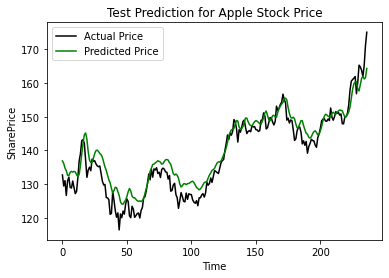

In [5]:
from IPython import display
display.Image("helpers/output.png")

## App Funcionalities 
The outcome of this project is a webapp that allows the user to both analyze desired stock data with integrated stock market metrics and also to train a LSTM model that evaluates the models performance and even gives an estimation about the upcoming value. 
Of course I will try enhance this project even more like adding parameters or maybe changing the code itself to add new functionalities. But the purpose of this project was to showcase both the Sofware- and Data Science Skills I've gathered throughout the Udacity Data Science Nanodegree. 

### Thx again to the Udacity Team for this amazing course - I learned a lot from this!!